In [1]:
!pip install mglearn
import mglearn
import sklearn
sklearn.__version__

     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=51118c641b3b6101641ccccbd7308fc150dbf649751cf54a85ccc3c7be014426
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


'0.22.2.post1'

# 지도학습 - 규제선형모델 (Ridge_Lasso_Regression)


Linear Regression의 문제

- 단순 선형회귀 : 단 하나의 특성(feature)을 가지고 라벨값(label) 또는 타깃(target)을 예측하기 위한
회귀 모델을 찾는 것
- 다중 선형회귀 : 여러 개의 특성을 활용해서 회귀모델을 찾는 것




다중 선형 회귀 모델은 과대적합(overfitting) 될 때가 종종 발생

주어진 샘플들의 특성값들과 라벨값의 관계를 필요이상으로 너무 자세하게 복잡하게 분석했다는 것 (오버피팅이 발생했다는 것)
- 새로운 데이터가 주어졌을 때 제대로 예측해내기가 어려움 (일반화 능력이 떨어짐)
- Ridge / Lasso / Elastic Regression 등장

Bias(편향) 오차와 Variance(분산) 오차

특성이 증가하면 복잡성이 증가 -> variance는 증가(조건이 많아짐), bias는 감소 -> Overfitting 발생

<center>
 <img src="https://t1.daumcdn.net/cfile/tistory/99CDCC33599AC28F07" alt="편향과 분산" width="40%" />

 Bias(편향) 오차와 Variance(분산) 오차를 표현

</center>

- bias 감소가 variance의 증가와 같아지는 최적의 point를 찾아야 함
- Overfitting 문제 해결 : 데이터의 복잡도 줄이기, 정규화를 통한 분산 감소

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F996DB433599AC34225B9BD" alt="모델 복잡도" width="40%" />

 모델 복잡도

</center>





|구분| 모델 복잡도| 적합성|
|---|---|---|
|Bias 오차가 낮은 & Variance 오차가 높은|복잡| 과대적합(over fitting)|
 |Bias 오차가 높은 Variance 오차가 낮은| 단순| 과소적합(under fitting)|

* Bias(편향) 에러가 높아지는 것은  많은 데이터를 고려하지 않아 (=모델이 너무 단순)  정확한 예측을 하지 못하는 경우

* Variance(분산) 에러는 노이즈까지 전부 학습하여 (=모델이 너무 복잡) 약간의 input에도 예측 Y 값이 크게 흔들리는 것

이 두가지 에러가 상호 Trade-off 관계에 있어서 이 둘을 모두 잡는 것은 불가능 한 딜레마가 발생

정규화(Regularization, 규제)

- 과대적합이 되지 않도록 모델을 강제로 제한하는 것을 의미.
- 가중치(w)의 값을 조정하여 제약을 주는 것.

- L1 규제 : Lasso
  - <font  color=yellow>w의 모든 원소에 똑같은 힘으로 규제를 적용하는 방법. 특정 계수들은 0이 됨.      
  /중요치 않다고 생각하는 데이터를 0으로 만드는 것임
  - 특성선택(Feature Selection)이 자동으로 이루어진다.</font>

- L2 규제 : Ridge
  - <font  color=yellow>w의 모든 원소에 골고루 규제를 적용하여 0에 가깝게 만든다.</font>


## Ridge Regression

평균제곱오차식에 alpha 항이 추가
- alpha 값을 크게 하면 패널티 효과가 커지고(가중치 감소),
- alpha 값을 작게 하면 그 반대가 된다.

- 기존 선형회귀에서는 적절한 가중치와 편향을 찾아내는 것이 관건
- 추가적인 제약 조건(규제항)을 포함 – 가중치에 대한 제곱의 합을 사용
- <font  color=yellow>MSE가 최소가 되게 하는 가중치(w)와 편향(b)을 찾는</font> 동시에 <font  color=yellow> MSE와 규제항의 합이 최소</font>가 되어야 함 -> 가중치 W의 모든 원소가 0이 되거나 0에 근사하도록 -> <font  color=yellow>학습한 가중치 (W)의 제곱을 규제항 (L2 규제)</font>으로 사용

> \\( cost(W,b)\\ =MSE+규제항\\ =MSE+\alpha \cdot { L }_{ 2 }norm\\ =\cfrac { 1 }{ m } \sum\limits _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum\limits _{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } \\ (n : 가중치의 개수, α : 규제의 정도) \\)

> MSE에 의한 Overfitting을 줄이기 위해 α를 크게 함 -> 정확도 감소 -> α가 너무 크면 MSE의 비중이 작아져서 과소적합 가능성 증가

- α가 증가하면 bias는 증가하고 variance는 감소하며 α가 0이 되면 MSE와 동일하게 되어 선형 회귀모델이 됨 -> Ridge 모델은 <font  color=yellow>bias을 약간 손해보면서 variance를 크게 줄여</font> 성능의 향상
- 단점 : <font  color=yellow>몇몇 변수가 중요하더라도 모든 변수에 대해 적합을 해야 하고 완벽한 0은 나오지 않음</font> -> 예측의 문제가 아니라 해석의 문제

In [ ]:
#코스트 함수에 규제항을 추가하는 것

Ridge()
```
Ridge(alpha, fit_intercept, normalize, copy_X, max_iter, tol, solver, random_state)
```

- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정


#### Ridge_Lasso_Regression 실습 01

확장 보스턴 집값 셋에 선형회귀 적용

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
%matplotlib inline

In [ ]:
# 확장 보스턴 집값
import mglearn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(379, 104)

In [ ]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#2차원이라서 y 1차열은 그냥 묵음 처리 느낌으로.

(506, 104)
(506,)
(379, 104)
(379,)
(127, 104)
(127,)


In [ ]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.9520519609032727

In [ ]:
model.score(X_test, y_test)

#학습했을 때는 0.95나오는데 테스트는 0.60으로 격차가 있음
#과대 적합임.

0.6074721959665571

확장 보스턴 집값 셋에 릿지회귀 적용

In [ ]:
# model_ridge
model_ridge = Ridge().fit(X_train, y_train)
#다른 값을 넣어주지 않으면 알파값이 1.0으로 자동배분 돠나봄

print('훈련 점수:', model_ridge.score(X_train, y_train) )
print('테스트점수:', model_ridge.score(X_test, y_test) )

훈련 점수: 0.8857966585170942
테스트점수: 0.7527683481744757


In [ ]:
model_ridge_10 = Ridge(alpha=10).fit(X_train, y_train)
#알파값을 올려보겠음

print('훈련 점수:', model_ridge_10.score(X_train, y_train) )
print('테스트점수:', model_ridge_10.score(X_test, y_test) )

훈련 점수: 0.7882787115369615
테스트점수: 0.6359411489177311


In [ ]:
model_ridge_01 = Ridge(alpha=0.1).fit(X_train, y_train)
#알파값을 내려보겠음

print('훈련 점수:', model_ridge_01.score(X_train, y_train) )
print('테스트점수:', model_ridge_01.score(X_test, y_test) )

훈련 점수: 0.9282273685001985
테스트점수: 0.7722067936480157


In [ ]:
model_ridge_01 = Ridge(alpha=0.21).fit(X_train, y_train)
#한번 이것저것 숫자 넣어봄,

print('훈련 점수:', model_ridge_01.score(X_train, y_train) )
print('테스트점수:', model_ridge_01.score(X_test, y_test) )

훈련 점수: 0.9192360477129711
테스트점수: 0.7748670203018291


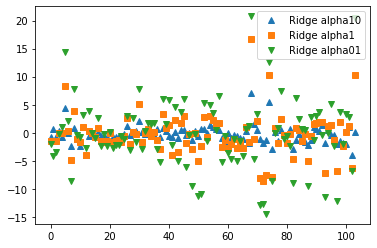

In [ ]:
#지금 들어 있는 가중치 값을 출력 해봅시당
plt.plot(model_ridge_10.coef_, '^', label='Ridge alpha10')
plt.plot(model_ridge.coef_, 's', label='Ridge alpha1')
#쉬프트 알트 누르고 내림버튼 누르면 알아서 복붙됨
plt.plot(model_ridge_01.coef_, 'v', label='Ridge alpha01')

#알파값을 쭐이면 줄일수록 더 퍼지는 것을 볼 수 있음,


plt.legend()

(-25.0, 25.0)

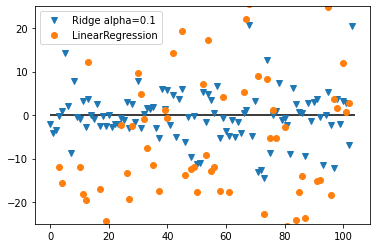

In [ ]:
#선형모델을 그려서 비교 한 번 해보자

#plt.plot(model_ridge_10.coef_, '^', label='Ridge alpha=10')
#plt.plot(model_ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(model_ridge_01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(model.coef_, 'o', label='LinearRegression')
plt.hlines(0, 0, len(model.coef_))
plt.legend()
plt.ylim(-25, 25)

## Lasso Regression

- 릿지 회귀의 단점을 해결하기 위해 대안으로 나온 방법
학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용
- 학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용

>$$  \begin{align} 
cost(W,b)   \\ 
& =MSE+규제항 \\  
& =MSE+\alpha \cdot { L }_{ 1 }norm \\  
& =\cfrac { 1 }{ m } \sum\limits_{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum\limits_{ j=1 }^{ n }{ \left| { w }_{ j } \right|  }  \\
& (n:가중치의개수,α:규제의정도)  \end{align} $$


- 적당한 α만으로 몇몇 계수를 정확하게 0으로 만들 수 있음 -> 해석을 용이하게 함
- MSE와 규제항의 합이 최소가 되게 하는 파라미터 W와 b를 찾는 것이 Lasso의 목표
- MSE항이 작아질 수록 오차가 작아지고, L1-norm이 작아질 수록 많은 가중치들이 0이 되거나 0에 가까워짐 -> 데이터 전 처리에 주로 사용 (필요 없는 데이터 제거)
- Ridge와 Lasso의 성능 차이는 사용하는 데이터의 상황에 따라 다름 -> 유의미한 변수가 적을 때는 Lasso가 반대의 경우는 Ridge가 더 좋은 성능을 보임.

Lasso()
```
Lasso(alpha, fit_intercept, normalize, precompute, copy_X, max_iter, tol, warm_start, positive, solver, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

In [ ]:
#라쏘는 멀리 있는 애들만 살아남아버림. 왜냐하면 0과 가까운것은 0으로 만들어버리니까

In [ ]:
from sklearn.linear_model import Lasso

# lasso
model_lasso = Lasso().fit(X_train, y_train)

print('훈련 점수:', model_lasso.score(X_train, y_train) )
print('테스트점수:', model_lasso.score(X_test, y_test) )
print('사용한 특성 수:', np.sum( model_lasso.coef_ != 0 ) )

#매우 과소 적합
#특성추출을 해보면, 

훈련 점수: 0.29323768991114607
테스트점수: 0.20937503255272294
사용한 특성 수: 4


In [ ]:
model_lasso.coef_
#거의다 0임

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -5.3529079 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [ ]:
print( model_lasso.coef_ != 0 )

#4개밖에 사용하지 않은 것임.

[False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False]


In [ ]:
model_lasso_001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

print('훈련 점수:', model_lasso_001.score(X_train, y_train) )
print('테스트점수:', model_lasso_001.score(X_test, y_test) )
print('사용한 특성 수:', np.sum( model_lasso_001.coef_ != 0 ) )

#max_iter를 1000이나 100으로 썼을 때 더 높이라는 문구가 뜨기 때문에 10000번으로 바꿔줌

훈련 점수: 0.8962226511086497
테스트점수: 0.7656571174549982
사용한 특성 수: 33


In [ ]:
model_lasso_00001 = Lasso(alpha=0.0001, max_iter=10000).fit(X_train, y_train)

print('훈련 점수:', model_lasso_00001.score(X_train, y_train) )
print('테스트점수:', model_lasso_00001.score(X_test, y_test) )
print('사용한 특성 수:', np.sum( model_lasso_00001.coef_ != 0 ) )

#max_iter를 더 높이라고 함

훈련 점수: 0.9501169448631187
테스트점수: 0.6506993940304697
사용한 특성 수: 97


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.181797420264, tolerance: 3.233182126649076
  positive)


In [ ]:
model_lasso_00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print('훈련 점수:', model_lasso_00001.score(X_train, y_train) )
print('테스트점수:', model_lasso_00001.score(X_test, y_test) )
print('사용한 특성 수:', np.sum( model_lasso_00001.coef_ != 0 ) )

#더 높여봄

#값의 범위가 좀 더 크게 차이남
#사용을 하냐 마냐로 나뉘어버려서, 0과 가까운 특성을 없애버리는 특징이 있음...

훈련 점수: 0.9507158754515463
테스트점수: 0.6437467421272822
사용한 특성 수: 96


(-25.0, 25.0)

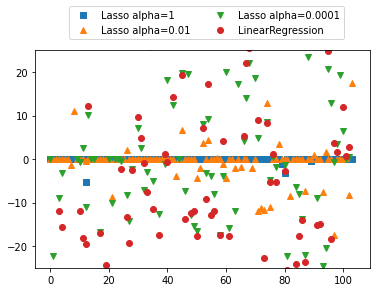

In [ ]:
plt.plot(model_lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(model_lasso_001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(model_lasso_00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(model.coef_, 'o', label='LinearRegression')
plt.hlines(0, 0, len(model.coef_))
plt.legend(ncol=2, loc= (0.1, 1.05))
#ncol1하면 1열 2하면 2열로 정렬 3하면 3정렬,
#loc는 margin값 개념으로 생각하면 됨 X,y
plt.ylim(-25, 25)

## ElasticNet Regression

- 선형 회귀에 2가지 규제항 (L1 규제항, L2 규제항)을 추가한 것

> \begin{align}
cost(W,b)\\ 
& =MSE+규제항\\
& =MSE+ { \alpha }_{ 1 }\cdot { L }_{ 1 }norm + { \alpha }_{ 2 }\cdot { L }_{ 2 }norm\\
& =\cfrac { 1 }{ m } \sum\limits _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 } +\alpha _{ 1 }\sum\limits _{ j=1 }^{ n }{ \left| { w }_{ j } \right|  +\alpha _{ 2 }\sum\limits_{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } } \\
& (n:가중치의개수,α:규제의정도) \end{align}

In [ ]:
#값을 함부로바꾸면 안돼는것 같은데...?

ElasticNet()
```
ElasticNet(alpha, l1_ratio, fit_intercept, normalize, precompute, max_iter, copy_X,
tol, warm_start, positive, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- l1_ratio : L1 규제의 비율 (혼합비율?)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

## 다항회귀

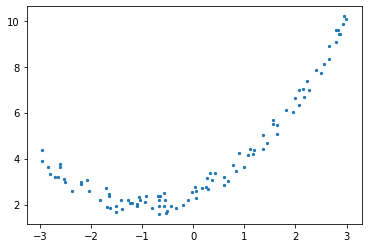

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = 6 * np.random.rand(n, 1) - 3
#강사님 마음대로 짠 숫자임 의미부여 X
y = 0.5 * x**2 + 1 * x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline  

poly_features = PolynomialFeatures(degree=2, include_bias=False)
#degree를 2차식으로 넣겠다는 것,
#이때 절편항도 같이 만들어지는데 이를 만들고 싶지 않으면 매개변수 include_bias에 False를 입력하면 된다.
x_poly = poly_features.fit_transform(x)
x_poly.shape, x.shape

((100, 2), (100, 1))

In [ ]:
x[0], x_poly[0]

(array([-2.80653761]), array([-2.80653761,  7.87665336]))

In [ ]:
model = LinearRegression()
model.fit(x_poly, y)
model.coef_, model.intercept_

(array([[0.99387509, 0.50653934]]), array([2.48118852]))

In [ ]:
model_lr = make_pipeline(poly_features, LinearRegression())

#poly_features를 거치면서 자동으로 학습됨

model_lr.fit(x, y)
model_lr.steps[1][1].coef_, model_lr.steps[1][1].intercept_
#steps = 두개가 들어있는데 이름과 실제 값이 들어가 있음.
#polynomialfeatures과linearregression이 들어가 잇슴.
#coef하면 데이터의 가중치가 튀어나와벌임잉ㅁ임
#intercept하면 편향값이 튀어나와벌이이이임임임잉

(array([[0.99387509, 0.50653934]]), array([2.48118852]))

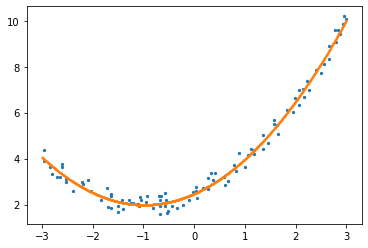

In [ ]:
# 다항회귀 그래프
plt.scatter(x, y, s=5)
xx = np.linspace(-3, 3, 1000)
#linespace하면 균등하게 하는 넘파이 매소드
yy = model_lr.predict(xx[:, np.newaxis])
#예측값, xx값을 리쉐입해서 넣어주는 것인데.
#xx.reshape(-1,1) 넣어줘도 되지만.xx[:, np.newaxis] 이렇게도 만들어짐.
plt.scatter(xx, yy, s=1)
#산점도로~

#결국 선이 만들어짐.

#### PolynomialFeatures()
```
PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True)
```

- degree : 차수
- interaction_only: True면 2차항에서 상호작용항만 출력
- include_bias : 상수항 생성 여부


다항 변환

- 입력값  x 를 다항식으로 변환한다.

> \\( x \;\; \rightarrow \;\; [ 1, x, x^2, x^3, \cdots ] \\) <br>
 
> 만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.

> \\( [x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1^2, x_1x_2, x_2^2 ] \\)  <br>

> 예) <br>
> \\( [x_1=0, x_2=1]  \;\; \rightarrow \;\; [1, 0, 1, 0, 0, 1] \\) <br>

> \\( [x_1=2, x_2=3]  \;\; \rightarrow \;\; [1,2,3,4,6,9] \\)
 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
poly = PolynomialFeatures(degree = 2)
#poly = PolynomialFeatures(2) 도 됨.
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
# 다항차수는 적용하지 않고, 오직 상호작용(교호작용) 효과만을 분석하려면 
# interaction_only=True 옵션을 설정해주면 됩니다. 
# degree를 가지고 교호작용을 몇 개 수준까지 볼지 설정해줄 수 있습니다.

poly = PolynomialFeatures(2, interaction_only=True)
poly.fit_transform(X)

#interation_only = true
#각각 자기 자신을 제곱한 것은 빠지게됨
#서로가 곱해진 것은 출력 됨.
#상호작용한 효과.

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

## Linear / Ridge / Lasso / ElasticNet Regression의 비교

|구분| 릿지회귀| 라쏘회귀| 엘라스틱넷|
|---|---|---|---|
|제약식| L2 norm| L1 norm| L1+L2 norm|
|변수선택 |불가능| 가능| 가능|
|solution| closed form| 명시해 없음| 명시해 없음|
|장점| 변수간 상관관계가 높아도 좋은 성능| 변수간 상관관계가 높으면 성능↓| 변수간 상관관계를 반영한 정규화|
|특징| 크기가 큰 변수를 우선 적으로 줄임|비중요 변수를 우선적 으로 줄임|상관관계가 큰 변수를 동시에 선택/배제|

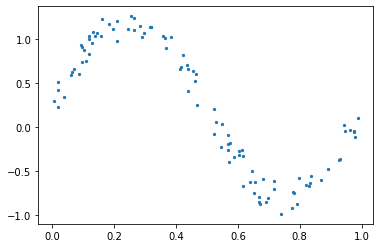

In [ ]:
import seaborn as sb
import pandas as pd

np.random.seed(0)
#매번 바뀌면 안돼니까 seed값을 준다네
n_samples = 100
X = np.sort(np.random.rand(n_samples))
#0번부터1사이의 숫자들을 오름차순 정렬
y = np.sin(2 * np.pi * X) + np.random.rand(n_samples) * 0.4
plt.scatter(X, y, s=5)
plt.show()

In [ ]:
df = pd.DataFrame({'x':X, 'y':y})
df.head(3)

,x,y
0,0.004695,0.300625
1,0.018790,0.225789
2,0.020108,0.420081


In [ ]:
X = X[:, np.newaxis]
#reshape(-1,1) 해준거임~

In [ ]:
poly = PolynomialFeatures(9)
model_lr = make_pipeline(poly, LinearRegression())
model_lr.fit(X, y)
#model_lr.fit(X.reshape(-1,1), y)로 해주어도 됨 위 코드 따로 안해주고.
model_lr.steps[1][1].coef_

array([ 0.00000000e+00, -2.39510416e+00,  1.87882198e+02, -1.75178518e+03,
        7.99994968e+03, -2.12034598e+04,  3.35865251e+04, -3.12482317e+04,
        1.57626223e+04, -3.33140526e+03])

(-1.5, 1.5)

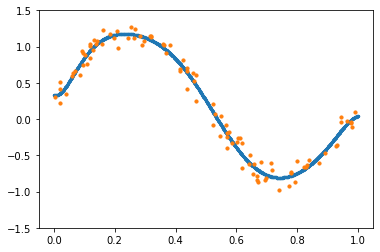

In [ ]:
xx = np.linspace(0, 1, 1000)
yy = model_lr.predict(xx[:, np.newaxis])
plt.scatter(xx, yy, s=5)
plt.scatter(X, y, s=10)
plt.ylim(-1.5, 1.5)

(-1.5, 1.5)

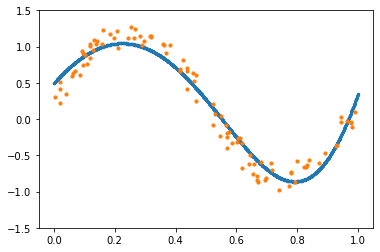

In [ ]:
#모델만 바꿔가면서 적용해보는 거임.
#ridge모델 적용

model_ridge = make_pipeline(poly, Ridge(alpha=0.01) )
model_ridge.fit(X, y)

xx = np.linspace(0, 1, 1000)
yy = model_ridge.predict(xx.reshape(-1, 1))
plt.scatter(xx, yy, s=5)
plt.scatter(X, y, s=10)
plt.ylim(-1.5, 1.5)

#약간 틀어지는 현상.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03498083386344586, tolerance: 0.005045731602109806
  positive)


array([ 0.        ,  4.11752272, -9.95817399, -0.        ,  0.        ,
        1.85387449,  3.8849429 ,  0.        ,  0.        ,  0.        ])

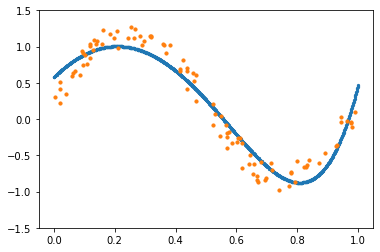

In [ ]:
model_lasso = make_pipeline(poly, Lasso(alpha=0.001) )
model_lasso.fit(X, y)

xx = np.linspace(0, 1, 1000)
yy = model_lasso.predict(xx.reshape(-1, 1))
plt.scatter(xx, yy, s=5)
plt.scatter(X, y, s=10)
plt.ylim(-1.5, 1.5)
model_lasso.steps[1][1].coef_

array([ 0.        ,  1.41331622, -4.11937084, -2.33903297, -0.        ,
        0.4144635 ,  1.28697129,  1.4253748 ,  1.10440837,  0.51849442])

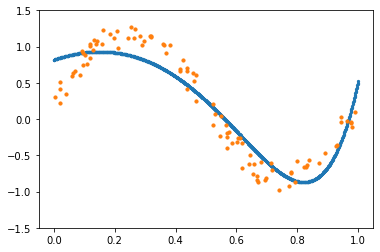

In [ ]:
model_el = make_pipeline(poly, ElasticNet(alpha=0.001, l1_ratio=0.5) )
#0과 좀 가까워지기 때문에 알파값을 좀 내리면 값이 커지면서, 리지,라소를 동시에 사용할 수 있음
#하지만 두개가 혼동이 생길 수있기 때문에 리지를 먼저 사용해서 밸런스를 맞춰보고
#그다음 라소를 이용해서 l1값을 빼보고 작업을 해보는거임
#그다음 익숙해지면 엘라스틱넷을 사용해 보는 것이 좋음. 
model_el.fit(X, y)

xx = np.linspace(0, 1, 1000)
yy = model_el.predict(xx.reshape(-1, 1))
plt.scatter(xx, yy, s=5)
plt.scatter(X, y, s=10)
plt.ylim(-1.5, 1.5)
model_el.steps[1][1].coef_